
--- Data Preview ---
   Exam_Score  Hours_Studied  Attendance  Previous_Scores  Sleep_Hours  \
0          67             23          84               73            7   
1          61             19          64               59            8   
2          74             24          98               91            7   
3          71             29          89               98            8   
4          70             19          92               65            6   

   Tutoring_Sessions  
0                  0  
1                  2  
2                  2  
3                  1  
4                  3  

--- Descriptive Statistics ---
        Exam_Score  Hours_Studied   Attendance  Previous_Scores  Sleep_Hours  \
count  6607.000000    6607.000000  6607.000000      6607.000000   6607.00000   
mean     67.235659      19.975329    79.977448        75.070531      7.02906   
std       3.890456       5.990594    11.547475        14.399784      1.46812   
min      55.000000       1.000000    60.000

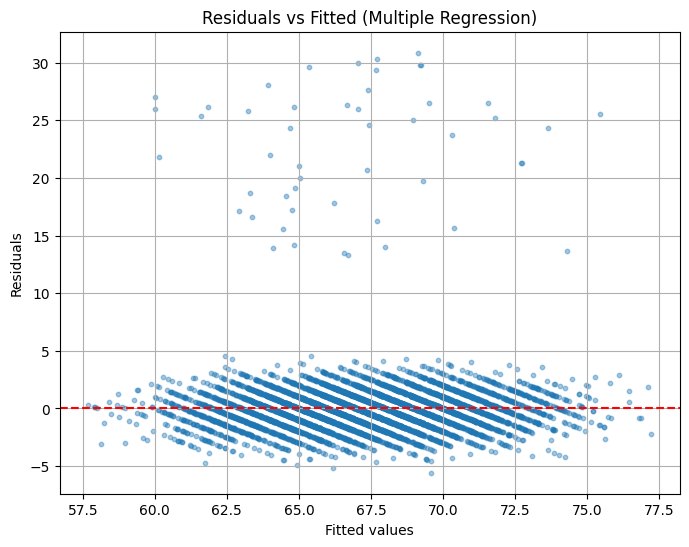

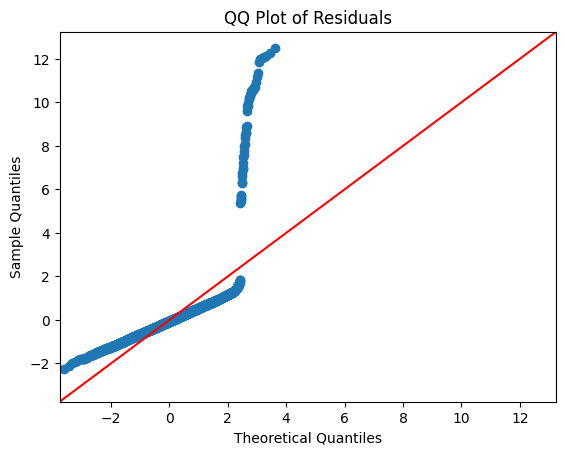


Breusch-Pagan Test:
LM stat = 3.2393, LM p-value = 0.6631
F stat = 0.6476, F p-value = 0.6634

Shapiro-Wilk Test (sample of 500): stat = 0.5250, p-value = 1.6203e-34

--- Interpretation ---
R-squared: 0.5968
Coefficient (Hours_Studied): 0.2917, p-value = 0.0000e+00
✅ Reject H₀ → Even after controlling for other factors, Hours_Studied significantly predicts Exam_Score.
✅ No evidence of heteroscedasticity.
⚠️  Residuals deviate from normality.


In [1]:
# 📘 Multiple Linear Regression on Student Performance
# Using pandas, statsmodels, matplotlib, and scipy

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_breuschpagan
from scipy import stats
import warnings
warnings.filterwarnings("ignore")

# ---------------------------
# 1️⃣ Load and prepare data
# ---------------------------
df = pd.read_csv("StudentPerformanceFactors.csv")

# Select relevant columns
cols = ["Exam_Score", "Hours_Studied", "Attendance", "Previous_Scores", 
        "Sleep_Hours", "Tutoring_Sessions"]
data = df[cols].dropna()

print("\n--- Data Preview ---")
print(data.head())

# ---------------------------
# 2️⃣ Descriptive statistics
# ---------------------------
print("\n--- Descriptive Statistics ---")
print(data.describe())

# ---------------------------
# 3️⃣ Correlation matrix
# ---------------------------
print("\n--- Correlation Matrix ---")
print(data.corr())

# ---------------------------
# 4️⃣ Multiple Linear Regression
# ---------------------------
# Define dependent (Y) and independent (X) variables
Y = data["Exam_Score"]
X = data[["Hours_Studied", "Attendance", "Previous_Scores", "Sleep_Hours", "Tutoring_Sessions"]]
X = sm.add_constant(X)  # Add intercept

# Fit the model
model = sm.OLS(Y, X).fit()

# Display full regression results
print("\n--- Multiple Regression Summary ---")
print(model.summary())

# ---------------------------
# 5️⃣ Diagnostic plots
# ---------------------------
residuals = model.resid
fitted = model.fittedvalues

# Residuals vs Fitted
plt.figure(figsize=(8,6))
plt.scatter(fitted, residuals, alpha=0.4, s=10)
plt.axhline(0, linestyle='--', color='red')
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted (Multiple Regression)")
plt.grid(True)
plt.show()

# QQ Plot of residuals
sm.qqplot(residuals, line='45', fit=True)
plt.title("QQ Plot of Residuals")
plt.show()

# ---------------------------
# 6️⃣ Model Diagnostics
# ---------------------------
bp_test = het_breuschpagan(residuals, X)
print("\nBreusch-Pagan Test:")
print(f"LM stat = {bp_test[0]:.4f}, LM p-value = {bp_test[1]:.4f}")
print(f"F stat = {bp_test[2]:.4f}, F p-value = {bp_test[3]:.4f}")

# Shapiro-Wilk test (on sample)
shapiro_stat, shapiro_p = stats.shapiro(residuals.sample(500, random_state=1))
print(f"\nShapiro-Wilk Test (sample of 500): stat = {shapiro_stat:.4f}, p-value = {shapiro_p:.4e}")

# ---------------------------
# 7️⃣ Interpretation
# ---------------------------
alpha = 0.05
r2 = model.rsquared
pval_study = model.pvalues["Hours_Studied"]
coef_study = model.params["Hours_Studied"]

print("\n--- Interpretation ---")
print(f"R-squared: {r2:.4f}")
print(f"Coefficient (Hours_Studied): {coef_study:.4f}, p-value = {pval_study:.4e}")

if pval_study < alpha:
    print("✅ Reject H₀ → Even after controlling for other factors, Hours_Studied significantly predicts Exam_Score.")
else:
    print("❌ Fail to reject H₀ → Hours_Studied is not significant after controlling for other factors.")

if bp_test[1] < alpha:
    print("⚠️  Heteroscedasticity detected.")
else:
    print("✅ No evidence of heteroscedasticity.")

if shapiro_p < alpha:
    print("⚠️  Residuals deviate from normality.")
else:
    print("✅ Residuals approximately normal.")
